In [132]:
import pandas as pd
import numpy as np

In [59]:
full_music_data=pd.read_csv('./2021_ICM_Problem_D_Data/full_music_data.csv')
data_by_artist=pd.read_csv('./2021_ICM_Problem_D_Data/data_by_artist.csv')

# scan&预处理

In [154]:
full_music_data['artist_names'] = full_music_data['artist_names'].map(lambda x: x.replace('["', '').replace('"]',''))
full_music_data['artists_id'] = full_music_data['artists_id'].map(lambda x: x.replace('[', '').replace(']', ''))

In [156]:
full_music_data.head()

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,Fat Freddy's Drop,178301,0.600,0.365,0.131,0.532777,0.615330,0,0.818182,0.0672,0.585000,0.0921,0.0498,0,0.231582,0.54,0.848485,2005,Ernie
1,Fat Freddy's Drop,178301,0.874,0.326,0.179,0.490063,0.610324,0,1.000000,0.0136,0.148000,0.0993,0.1310,0,0.308656,0.53,0.848485,2005,Wandering Eye
2,Fat Freddy's Drop,178301,0.670,0.531,0.336,0.571037,0.725425,0,0.818182,0.0156,0.345000,0.3060,0.0377,0,0.228416,0.55,0.888889,8/7/2009,The Raft
3,Alexander O'Neal,625201,0.761,0.702,0.850,0.429237,0.719573,1,0.636364,0.1080,0.000031,0.0935,0.0389,0,0.160421,0.34,0.707071,1/1/1991,All True Man
4,Alexander O'Neal,625201,0.661,0.828,0.902,0.471455,0.624703,0,1.000000,0.2760,0.000001,0.2870,0.0390,0,0.139254,0.37,0.666667,7/29/1987,(What Can I Say) To Make You Love Me


In [8]:
full_music_data.info()#无空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98340 entries, 0 to 98339
Data columns (total 19 columns):
artist_names             98340 non-null object
artists_id               98340 non-null object
danceability             98340 non-null float64
energy                   98340 non-null float64
valence                  98340 non-null float64
tempo                    98340 non-null float64
loudness                 98340 non-null float64
mode                     98340 non-null int64
key                      98340 non-null int64
acousticness             98340 non-null float64
instrumentalness         98340 non-null float64
liveness                 98340 non-null float64
speechiness              98340 non-null float64
explicit                 98340 non-null int64
duration_ms              98340 non-null int64
popularity               98340 non-null int64
year                     98340 non-null int64
release_date             98340 non-null object
song_title (censored)    98340 non-null ob

In [6]:
music_feature=['danceability',	'energy',	'valence',	'tempo',	'loudness',	'mode',	'key']
voice_feature=['acousticness'	,'instrumentalness',	'liveness',	'speechiness',	'explicit'	]

# 数据标准化

In [35]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()  

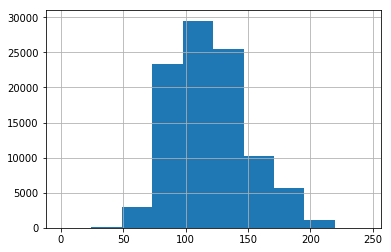

In [60]:
full_music_data['tempo'].hist()#对hist特征进行0-1标准化

In [61]:
full_music_data['tempo']=min_max_scaler.fit_transform(full_music_data['tempo'].values.reshape(-1, 1))

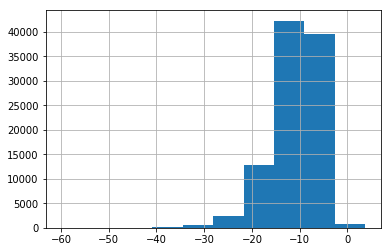

In [62]:
full_music_data['loudness'].hist()#小于-40的都取-40，然后再0-1

In [63]:
full_music_data.loc[full_music_data[full_music_data['loudness']<-40].index,('loudness')]=[-40]*21

In [64]:
full_music_data['loudness']=min_max_scaler.fit_transform(full_music_data['loudness'].values.reshape(-1, 1))

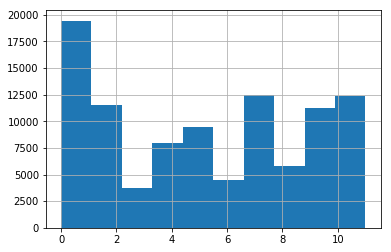

In [65]:
full_music_data['key'].hist()#0-1标准化

In [66]:
full_music_data['key']=min_max_scaler.fit_transform(full_music_data['key'].values.reshape(-1, 1))

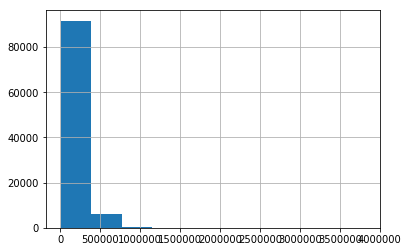

In [67]:
full_music_data['duration_ms'].hist()#?

In [68]:
#z-score测试
mean=full_music_data['duration_ms'].mean()

In [69]:
std=full_music_data['duration_ms'].std()

In [70]:
x_zsed=preprocessing.scale(full_music_data['duration_ms'])

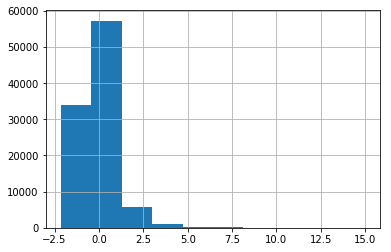

In [71]:
full_music_data['duration_ms']=x_zsed
full_music_data.loc[full_music_data[full_music_data['duration_ms']>15].index,('duration_ms')]=[15]*16

full_music_data['duration_ms'].hist()

In [34]:
test[test[1]>15].shape[0]#只有16支歌曲z-score后长度大于15，全部改为15，再做minmax标准化

16

In [72]:
full_music_data['duration_ms']=min_max_scaler.fit_transform(full_music_data['duration_ms'].values.reshape(-1, 1))

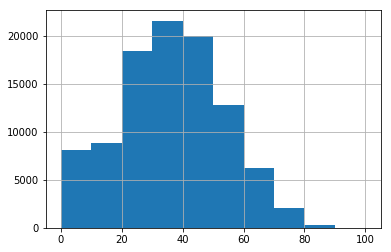

In [16]:
full_music_data['popularity'].hist()#0-1

In [73]:
full_music_data['popularity']=min_max_scaler.fit_transform(full_music_data['popularity'].values.reshape(-1, 1))

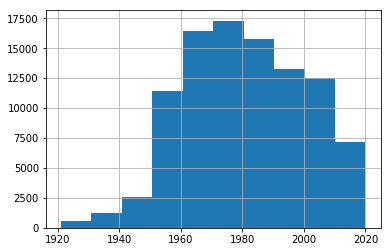

In [17]:
full_music_data['year'].hist()#min-max，越接近0越老，越接近1越新

In [74]:
full_music_data['year']=min_max_scaler.fit_transform(full_music_data['year'].values.reshape(-1, 1))

In [76]:
full_music_data.to_csv('./after standard full music.csv')

# 分类降维

In [77]:
import seaborn as sns

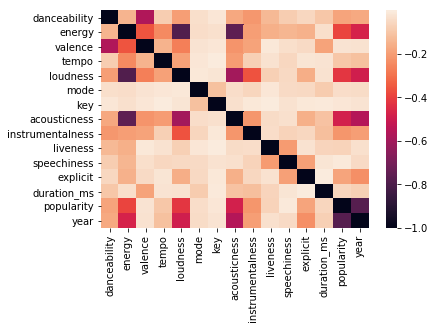

In [82]:
sns.heatmap(-full_music_data.corr().abs(),
xticklabels=full_music_data.corr().columns.values,
yticklabels=full_music_data.corr().columns.values,
)#假使以图片中心点为坐标原点，那么显然2、4象限颜色偏黑白（相关性高），1、3象限颜色偏红（相关性低），证明预先将特征分为音乐特征、人声类型、音轨描述，再进行降维是有道理的

In [80]:
full_music_data.head()

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,0.532777,0.615330,0,0.818182,0.0672,0.585000,0.0921,0.0498,0,0.231582,0.54,0.848485,2005,Ernie
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,0.490063,0.610324,0,1.000000,0.0136,0.148000,0.0993,0.1310,0,0.308656,0.53,0.848485,2005,Wandering Eye
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,0.571037,0.725425,0,0.818182,0.0156,0.345000,0.3060,0.0377,0,0.228416,0.55,0.888889,8/7/2009,The Raft
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,0.429237,0.719573,1,0.636364,0.1080,0.000031,0.0935,0.0389,0,0.160421,0.34,0.707071,1/1/1991,All True Man
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,0.471455,0.624703,0,1.000000,0.2760,0.000001,0.2870,0.0390,0,0.139254,0.37,0.666667,7/29/1987,(What Can I Say) To Make You Love Me


In [95]:
music_feature=['danceability',	'energy',	'valence',	'tempo',	'loudness',	'mode',	'key']
voice_feature=['acousticness'	,'instrumentalness',	'liveness',	'speechiness',	'explicit'	]
describe_feature=['duration_ms',	'popularity',	'year'	]
music_feature_data=full_music_data.loc[:,('danceability',	'energy',	'valence',	'tempo',	'loudness',	'mode',	'key')]
voice_feature_data=full_music_data.loc[:,('acousticness'	,'instrumentalness',	'liveness',	'speechiness',	'explicit')]
describe_feature_data=full_music_data.loc[:,('duration_ms',	'popularity',	'year')]

In [84]:
from sklearn.decomposition import PCA

In [241]:
#音乐特征
pca=PCA(n_components=3)
new_music_feature_data=pca.fit_transform(music_feature_data)

In [246]:
pca.components_

array([[ 0.01464409,  0.03495782, -0.00596403, -0.00283869,  0.0076777 ,
        -0.98668636,  0.15783202],
       [-0.2420241 , -0.63383836, -0.60908368, -0.08982122, -0.23012255,
        -0.07499731, -0.31943935],
       [-0.08820225, -0.2168513 , -0.21217432, -0.03071361, -0.07938932,
         0.14121951,  0.9343388 ]])

修改后的组分

array([[ 0.15783202,  0.03495782, -0.00596403, -0.00283869,  0.0076777 ,
        -0.98668636,  0.01464409],#突出'loudness',	'mode',	'key'三个“其它特征”

       [-0.2420241 , -0.63383836, -0.60908368, -0.08982122, -0.23012255,
        -0.07499731, -0.31943935],#突出'energy',	'valence',两个“情感特征
        
       [0.9343388, -0.1168513 , -0.11217432, -0.43071361, -0.07938932,
         0.14121951,  -0.08820225 ]])#突出'danceability',	'tempo'两个节奏类特征

In [113]:
sum(pca.explained_variance_ratio_)

0.8254384567075188

In [235]:
#人声特征
pca=PCA(n_components=3)
new_voice_feature_data=pca.fit_transform(voice_feature_data)

In [236]:
pca.components_

array([[ 0.93524661,  0.33525585, -0.03325449, -0.01203436, -0.10801204],
       [-0.33514071,  0.94118326, -0.0269662 , -0.01602182,  0.02951097],
       [ 0.09454042,  0.03415833,  0.70059992,  0.12912666,  0.69453681]])

In [151]:
pca.explained_variance_ratio_

array([0.48617794, 0.24233794, 0.12938711])

In [115]:
sum(pca.explained_variance_ratio_)

0.8579029955463436

In [237]:
#音乐描述
pca=PCA(n_components=1)
new_describe_feature_data=pca.fit_transform(describe_feature_data)

In [238]:
pca.components_

array([[0.01747102, 0.64243847, 0.76613809]])

In [106]:
pca.explained_variance_ratio_

array([0.84965615])

In [126]:
pcaed_fullmusic1=pd.DataFrame(new_music_feature_data,columns=['music1','music2','music3'])
pcaed_fullmusic2=pd.DataFrame(new_voice_feature_data,columns=['voice1','voice2','voice3'])
pcaed_fullmusic3=pd.DataFrame(new_describe_feature_data,columns=['describe'])

In [202]:
pcaed_data=pd.concat([pcaed_fullmusic1,pcaed_fullmusic2,pcaed_fullmusic3], axis=1)

In [203]:
pcaed_data.to_csv('./problem2 data/pcaed data.csv')

In [204]:
pcaed_data.head()

,music1,music2,music3,voice1,voice2,voice3,describe
0,0.764115,0.286063,0.340290,-0.167053,0.552554,-0.125637,0.304821
1,0.795257,0.162141,0.485984,-0.364905,0.157725,-0.130102,0.299743
2,0.770457,0.010270,0.244707,-0.302740,0.338389,0.009583,0.342145
3,-0.240324,-0.436043,0.066701,-0.324924,-0.011546,-0.142188,0.066747
4,0.805538,-0.546500,0.241940,-0.174249,-0.073097,0.009273,0.054695


In [205]:
def cos_sim(vector_a, vector_b):
    """
    计算两个向量之间的余弦相似度
    """
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    sim = 0.5 + 0.5 * cos
    return sim

In [206]:
array1=pcaed_data.loc[1,:].values
array2=pcaed_data.loc[2,:].values

In [207]:
cos_sim(array1,array2)

0.9690260287225156

In [208]:
array1

array([ 0.79525705,  0.16214116,  0.48598425, -0.36490531,  0.15772485,
       -0.13010203,  0.2997431 ])

# 测试用数据

同类歌手：
Bob Dylan	66915
The Beatles	754032
The Rolling Stones	894465

不同类歌手：

In [157]:
full_music_data.head()

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,Fat Freddy's Drop,178301,0.600,0.365,0.131,0.532777,0.615330,0,0.818182,0.0672,0.585000,0.0921,0.0498,0,0.231582,0.54,0.848485,2005,Ernie
1,Fat Freddy's Drop,178301,0.874,0.326,0.179,0.490063,0.610324,0,1.000000,0.0136,0.148000,0.0993,0.1310,0,0.308656,0.53,0.848485,2005,Wandering Eye
2,Fat Freddy's Drop,178301,0.670,0.531,0.336,0.571037,0.725425,0,0.818182,0.0156,0.345000,0.3060,0.0377,0,0.228416,0.55,0.888889,8/7/2009,The Raft
3,Alexander O'Neal,625201,0.761,0.702,0.850,0.429237,0.719573,1,0.636364,0.1080,0.000031,0.0935,0.0389,0,0.160421,0.34,0.707071,1/1/1991,All True Man
4,Alexander O'Neal,625201,0.661,0.828,0.902,0.471455,0.624703,0,1.000000,0.2760,0.000001,0.2870,0.0390,0,0.139254,0.37,0.666667,7/29/1987,(What Can I Say) To Make You Love Me


In [164]:
dylan_song=full_music_data[full_music_data['artists_id']=='66915']
beatles_song=full_music_data[full_music_data['artists_id']=='754032']
rollstone_song=full_music_data[full_music_data['artists_id']=='894465']

In [163]:
full_music_data.loc[14290,:]

artist_names                                        ['Bob Dylan']
artists_id                                                  66915
danceability                                                0.549
energy                                                      0.121
valence                                                     0.462
tempo                                                    0.543047
loudness                                                 0.569678
mode                                                            1
key                                                      0.181818
acousticness                                                0.988
instrumentalness                                           0.0168
liveness                                                    0.107
speechiness                                                0.0383
explicit                                                        0
duration_ms                                              0.186711
popularity

# 测试同类、不同类歌手的歌曲的相似度

In [183]:
kmeansed_data=pd.read_csv('./problem2 data/Kmeans.csv')

In [184]:
group0_id=kmeansed_data[kmeansed_data['cluster']==0]['artists_id'].unique()
group1_id=kmeansed_data[kmeansed_data['cluster']==1]['artists_id'].unique()
group2_id=kmeansed_data[kmeansed_data['cluster']==2]['artists_id'].unique()

In [185]:
group0_song=[]#存储每个0类歌手的所有歌曲的index，按group0_id中的顺序排列
for artist_id in group0_id:
    id_song=full_music_data[full_music_data['artists_id']==str(artist_id)].index
    group0_song.append(id_song)

In [186]:
group1_song=[]#存储每个1类歌手的所有歌曲的index，按group1_id中的顺序排列
for artist_id in group1_id:
    id_song=full_music_data[full_music_data['artists_id']==str(artist_id)].index
    group1_song.append(id_song)
group2_song=[]#存储每个2类歌手的所有歌曲的index，按group2_id中的顺序排列
for artist_id in group2_id:
    id_song=full_music_data[full_music_data['artists_id']==str(artist_id)].index
    group2_song.append(id_song)

## 同类歌手不同歌曲的相似度计算

选取一名歌手，分别计算他和同类、非同类歌手歌曲的相似度

In [187]:
ori_songs=group0_song[0]
group0_song.remove(ori_songs)
others_song=group0_song

In [189]:
compare_song_list=[]
for i in others_song:
    for j in i:
        compare_song_list.append(j)

In [194]:
same_cluster_compare=pd.DataFrame()#存放这个歌手各歌曲于其它歌手歌曲的比较结果

In [214]:
for ori_song in ori_songs:
    compare_result=[]
    for oth_sons in others_song:
        for oth_son in oth_sons:
            array1=pcaed_data.loc[ori_song,:].values
            array2=pcaed_data.loc[oth_son,:].values
            cos_diff=cos_sim(array1,array2)
            compare_result.append(cos_diff)
    same_cluster_compare[ori_song]=compare_result

In [216]:
same_cluster_compare.head()

,18,19,20,21,22,23,24,25,26,27,...,105,106,107,108,109,110,111,112,113,114
0,0.321115,0.514333,0.373107,0.308102,0.289894,0.487228,0.337989,0.343168,0.537745,0.470698,...,0.131296,0.077253,0.177800,0.481212,0.379598,0.493603,0.377543,0.474478,0.332180,0.305411
1,0.243622,0.129159,0.371384,0.248482,0.484530,0.137881,0.224689,0.219011,0.215716,0.128195,...,0.795006,0.746658,0.636025,0.127188,0.160917,0.136769,0.180854,0.201586,0.501558,0.283105
2,0.314840,0.314325,0.505185,0.351510,0.081381,0.315309,0.312146,0.302956,0.433252,0.297104,...,0.119506,0.111759,0.063633,0.298413,0.336228,0.308483,0.325478,0.399395,0.115269,0.337198
3,0.279571,0.477903,0.479245,0.299819,0.329514,0.541658,0.485662,0.296868,0.787289,0.484992,...,0.216088,0.159252,0.345743,0.445633,0.367540,0.507385,0.439748,0.717505,0.318898,0.278522
4,0.343642,0.470288,0.490652,0.356614,0.262123,0.473405,0.387654,0.354203,0.559918,0.439666,...,0.183937,0.134373,0.206936,0.438535,0.401610,0.466578,0.402379,0.511062,0.299534,0.338704


## 不同类歌手不同歌曲的相似度计算

In [217]:
ori_songs=group0_song[0]
others1_song=group1_song
others2_song=group2_song

In [218]:
compare_song_list1=[]
for i in others1_song:
    for j in i:
        compare_song_list1.append(j)
compare_song_list2=[]
for i in others2_song:
    for j in i:
        compare_song_list2.append(j)

In [219]:
diff_cluster1_compare=pd.DataFrame()#存放这个歌手各歌曲与另一类歌手歌曲的比较结果
diff_cluster2_compare=pd.DataFrame()#存放这个歌手各歌曲与另二类歌手歌曲的比较结果

In [221]:
for ori_song in ori_songs:
    compare_result=[]
    for oth_sons in others1_song:
        for oth_son in oth_sons:
            array1=pcaed_data.loc[ori_song,:].values
            array2=pcaed_data.loc[oth_son,:].values
            cos_diff=cos_sim(array1,array2)
            compare_result.append(cos_diff)
    diff_cluster1_compare[ori_song]=compare_result
for ori_song in ori_songs:
    compare_result=[]
    for oth_sons in others2_song:
        for oth_son in oth_sons:
            array1=pcaed_data.loc[ori_song,:].values
            array2=pcaed_data.loc[oth_son,:].values
            cos_diff=cos_sim(array1,array2)
            compare_result.append(cos_diff)
    diff_cluster2_compare[ori_song]=compare_result

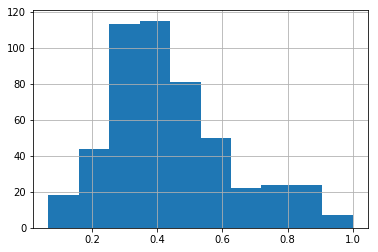

In [227]:
diff_cluster1_compare[201].hist()

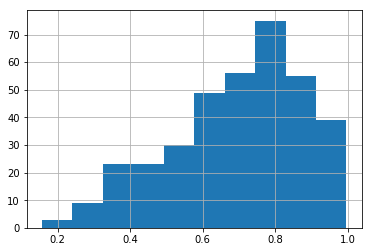

In [226]:
same_cluster_compare[18].hist()

In [229]:
same_cluster_compare.to_csv('./problem2 data/same_type diff vale.csv')
diff_cluster1_compare.to_csv('./problem2 data/diff_type1 diff vale.csv')
diff_cluster2_compare.to_csv('./problem2 data/diff_type2 diff vale.csv')